# Exercícios 4.2, 4.3 e 4.4 do livro texto

<div style="text-align: right"> 
2018/3  <br/>
Aluno: Pedro Bandeira de Mello Martins  <br/>
Disciplina: CPE773 - Otimização Convexa  <br/>
Professor: Wallace A. Martins  <br/>
PEE/COPPE - UFRJ  </div>

Minimizar $f(x)$ no intervalo dado com incerteza menor que $10^{-5}$ com os métodos:

1. Fibonacci Search
2. Golden-Section Search
3. Quadratic Interpolaton Method
4. Cubic Interpolation Method
5. Davies, Swann and Campey algorithm
6. Backtracking Line Search
7. Brute Force (implementação do scipy)

O algoritmo de força bruta foi utilizado para compararmos a quantidade necessária de avaliações para se chegar ao mesmo resultado.

Os pacotes utilizados nesses exercícios são:

In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import time
from copy import copy

from scipy.optimize import brute
from functions import order5_polynomial, logarithmic, sinoid, order4_polynomial
from functions import functionObj
from models.optimizers import DichotomousSearch, \
                                FibonacciSearch, GoldenSectionSearch, \
                                QuadraticInterpolationSearch, \
                                CubicInterpolation, DaviesSwannCampey, \
                                BacktrackingLineSearch, InexactLineSearch


Para cada exercício, a função do arquivo [run_exercises.py](run_exercises.py) é rodada, onde se entrega a função a ser minimizada pelos métodos acima e ela retorna um _dataframe_ com todas as informações obtidas durante as minimizações.

In [2]:
from run_exercises import run_exercise

Os gráficos são gerados pela função:

In [3]:
def show_chart(df):
    fig, axes = plt.subplots(4, 2, figsize = (13, 10))
    for algorithm, ax in zip(df.index, axes.flatten()):
        ax.plot(range(1, df['fevals'][algorithm] + 1), df['all_evals'][algorithm])
        ax.set_title(algorithm)
        ax.ticklabel_format(axis = 'y', style = 'plain')
        ax.set_xlabel('Function evaluations')
        ax.set_ylabel('$f(x)$')
    plt.tight_layout()
    plt.show()

## Exercício 4.2
$f(x) = -5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1$

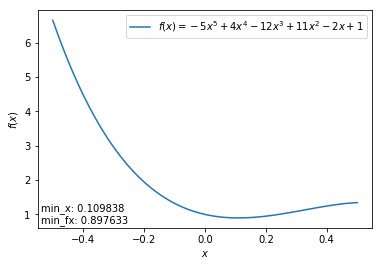

In [4]:
results_42 = run_exercise(order5_polynomial, f_string = '$f(x) = -5x^5+4x^4-12x^3+11x^2-2x+1$', interval = [-0.5, 0.5])

### Resultados

In [5]:
results_42[['best_f', 'best_x', 'fevals', 'run_time (s)']]

,best_f,best_x,fevals,run_time (s)
Brute Force,0.897633,0.109838,43,0.014048
Dichotomous Search,0.897633,0.109862,34,0.002169
Fibonacci Search,0.897633,0.109860,3,0.000293
Golden-Section Search,0.897633,0.109860,3,0.000198
Quadratic Interpolation Method,0.897633,0.109860,5,0.000343
Cubic interpolation Method,0.897633,0.109860,5,0.001874
"Davies, Swann and Campey Algorithm",0.897633,0.109861,9,0.001584
Backtracking Line Search,0.897633,0.109860,6,0.004054


### Eficiência computacional em avaliações de funções e tempo de execução.

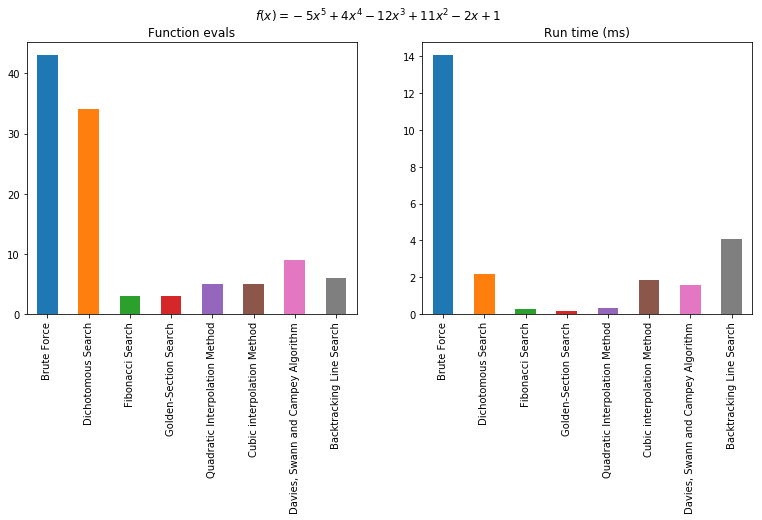

In [6]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('$f(x) = -5x^5+4x^4-12x^3+11x^2-2x+1$')
results_42['fevals'].plot.bar(title = 'Function evals', ax= axes[0])
(results_42['run_time (s)']*1e3).plot.bar(title = 'Run time (ms)', ax=axes[1])
plt.show()

A tabela de resultados e os gráficos de eficiência computacional demonstram que a força bruta é a minimização de maior custo computacional tanto em número de avaliações de funções quanto em tempo de execução.  
Apesar da Dichotomous Search ser o segundo algoritmo a utilizar mais avalições de funções, possui um tempo de execução menor do que o método de interpolação cúbica (_Cubic Interpolation Method_) e a busca por retrocesso (_Backtracking Line Search_). Isso provavelmente acontece porque o _Cubic Interpolation Method_ precisa fazer diversos passos de cálculo, incluindo estimar o gradiente da função objetivo. O _Backtracking Line Search_ também pode ter levado mais tempo por precisar estimar o gradiente da função objetivo. O gradiente  é calculado com a biblioteca [autograd](https://github.com/HIPS/autograd).  
Neste exercício a busca de seção dourada (_Golden-Section Search_) foi o algoritmo de menor tempo de execução e avaliação de funções.

### Gráficos de f(x) por avaliações.

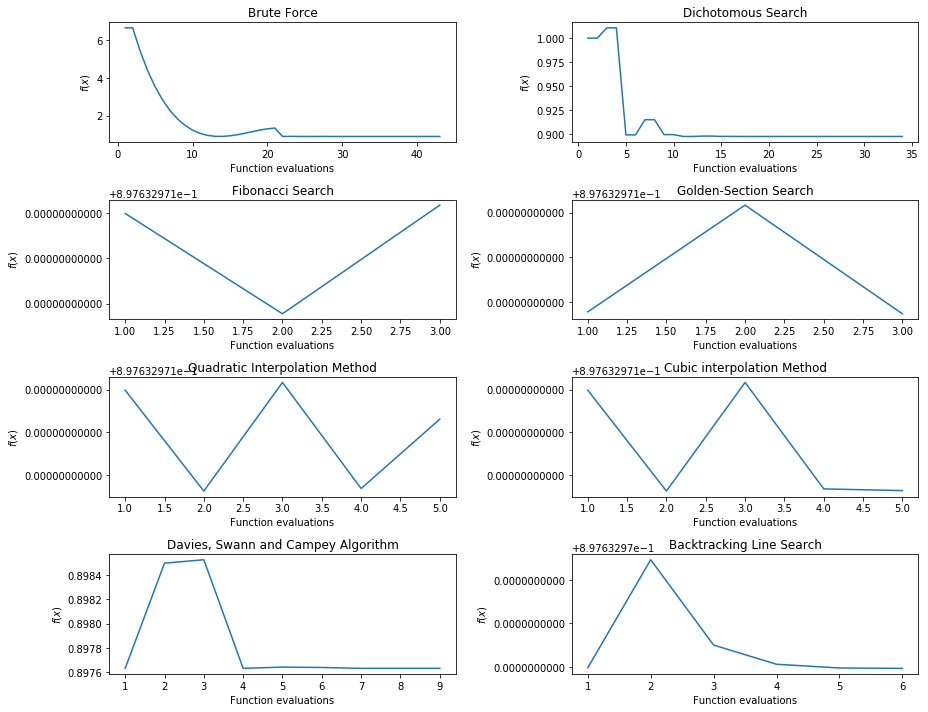

In [7]:
show_chart(results_42)

Pelos gráficos de $f(x)$ por avaliações de funções, podemos ver que os algoritmos _Fibonacci Search_, _Golden-Section Search_, _Quadratic Interpolation Method_, _Cubic Interpolation Method_ e _Backtracking Line Search_ encontraram o resultado logo na primeira avaliação de função, porém continuaram a rodar até entregarem o resultado.

## Exercício 4.3
$f(x) = \ln ^2 (x-2) + \ln ^2(10-x) - x^{0.2}$

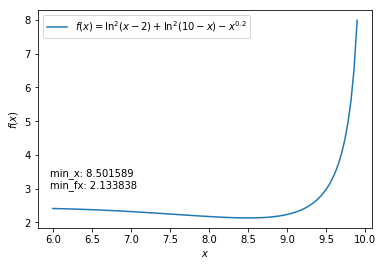

In [8]:
results_43 = run_exercise(logarithmic, f_string = '$f(x) = \ln ^2 (x-2) + \ln ^2(10-x) - x^{0.2}$', 
                          seed =  9, 
                          textpos = (12,40),
                          interval = [6, 9.9])

### Resultados

In [9]:
results_43[['best_f', 'best_x', 'fevals', 'run_time (s)']]

,best_f,best_x,fevals,run_time (s)
Brute Force,2.133838,8.501589,49,0.009354
Dichotomous Search,2.133838,8.501585,38,0.003955
Fibonacci Search,2.133838,8.501586,3,0.000386
Golden-Section Search,2.133838,8.501586,3,0.000285
Quadratic Interpolation Method,2.133838,8.501587,5,0.000486
Cubic interpolation Method,2.133838,8.501587,10,0.005025
"Davies, Swann and Campey Algorithm",2.133838,8.501585,15,0.002365
Backtracking Line Search,2.133838,8.501587,2,0.002121


### Eficiência computacional em avaliações de funções e tempo de execução.

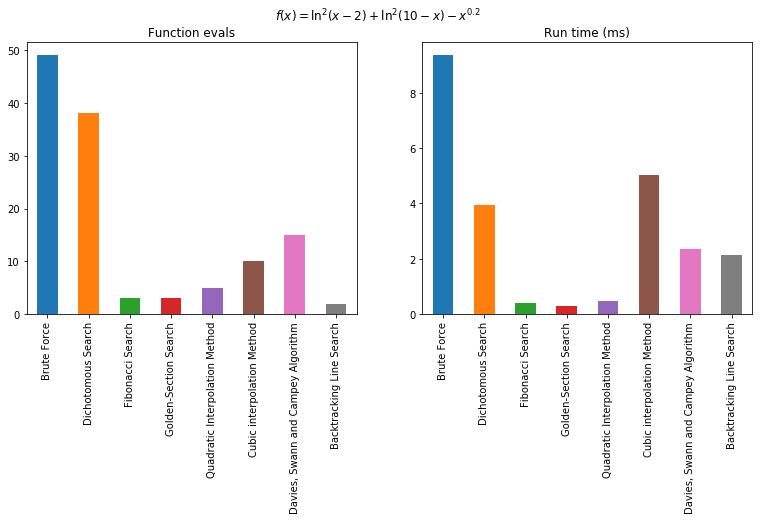

In [10]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('$f(x) = \ln ^2 (x-2) + \ln ^2(10-x) - x^{0.2}$')
results_43['fevals'].plot.bar(title = 'Function evals', ax= axes[0])
(results_43['run_time (s)']*1e3).plot.bar(title = 'Run time (ms)', ax=axes[1])
plt.show()

No exercício 4.3 observa-se que a força bruta continua sendo o algoritmo de menor eficiência computacional. 
Os algoritmos que utilizam gradiente da função também se mostraram menos eficientes computacionalmente em tempo de execução, apesar de terem efetuado poucas avaliações de funções.  
Ao contrário do exercício 4.2, o Dichotomous Search permaneceu em segunda pior avaliação tanto em _Function Evals_ quanto em _Run time (ms)_.

### Gráficos de f(x) por avaliações.

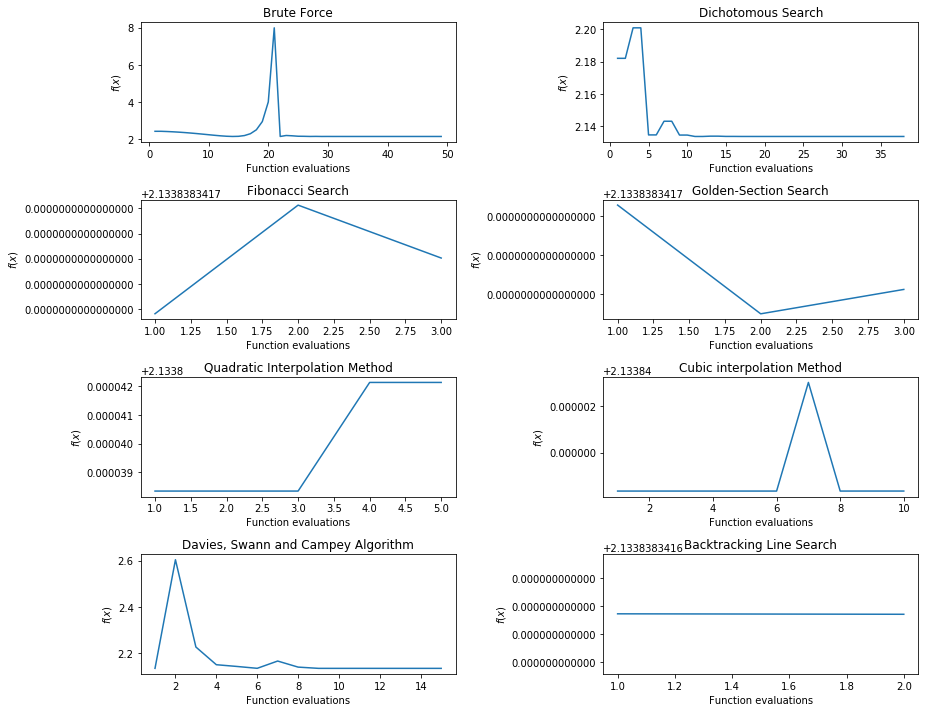

In [11]:
show_chart(results_43)

Nos gráficos de $f(x)$ por avaliações do exercício 4.3, é interessante notar que o _Dichotomous Search_ obteve o mesmo comportamento do exercício 4.2, apesar de atingir valores diferentes de $f(x)$. Os algoritmos _Fibonacci Search_, _Golden-Section Search_, _Cubic Interpolation Method_ e _Backtracking Line Search_ atingiram o mínimo global na primeira iteração. Apesar do algoritmo _Quadratic Interpolation Method_ ter variado mais do que os já citados, ele permaneceu dentrou da tolerância de erro durante as 5 iterações.

## Exercício 4.4
$f(x) = -3x\sin 0.75 x + e ^{-2x}$

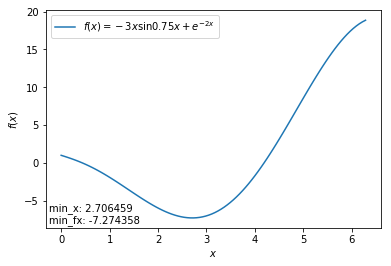

In [12]:
results_44 = run_exercise(sinoid, f_string = '$f(x) = -3x\sin 0.75 x + e ^{-2x}$', 
                          seed =  9, 
                          interval = [0, 2*np.pi])

### Resultados

In [13]:
results_44[['best_f', 'best_x', 'fevals', 'run_time (s)']]

,best_f,best_x,fevals,run_time (s)
Brute Force,-7.274358,2.706459,45,0.008179
Dichotomous Search,-7.274358,2.706477,40,0.003393
Fibonacci Search,-7.274358,2.706476,3,0.000368
Golden-Section Search,-7.274358,2.706476,3,0.000244
Quadratic Interpolation Method,-7.274358,2.706476,5,0.000421
Cubic interpolation Method,-7.274358,2.706476,5,0.001413
"Davies, Swann and Campey Algorithm",-7.274358,2.706475,12,0.001974
Backtracking Line Search,-7.274358,2.706476,5,0.002376


### Eficiência computacional em avaliações de funções e tempo de execução.

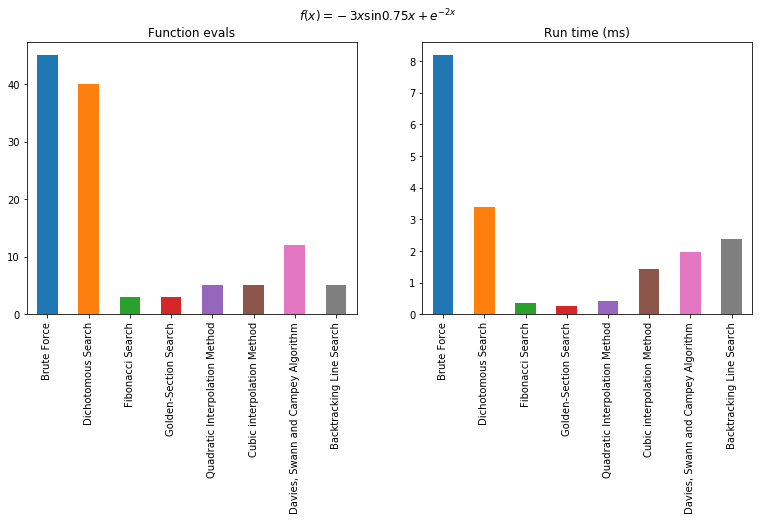

In [14]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('$f(x) = -3x\sin 0.75 x + e ^{-2x}$')
results_44['fevals'].plot.bar(title = 'Function evals', ax= axes[0])
(results_44['run_time (s)']*1e3).plot.bar(title = 'Run time (ms)', ax=axes[1])
plt.show()

Os resultados obtidos no exercício 4.4 foram próximos dos resultados do exercício 4.3.

### Gráficos de f(x) por avaliações.

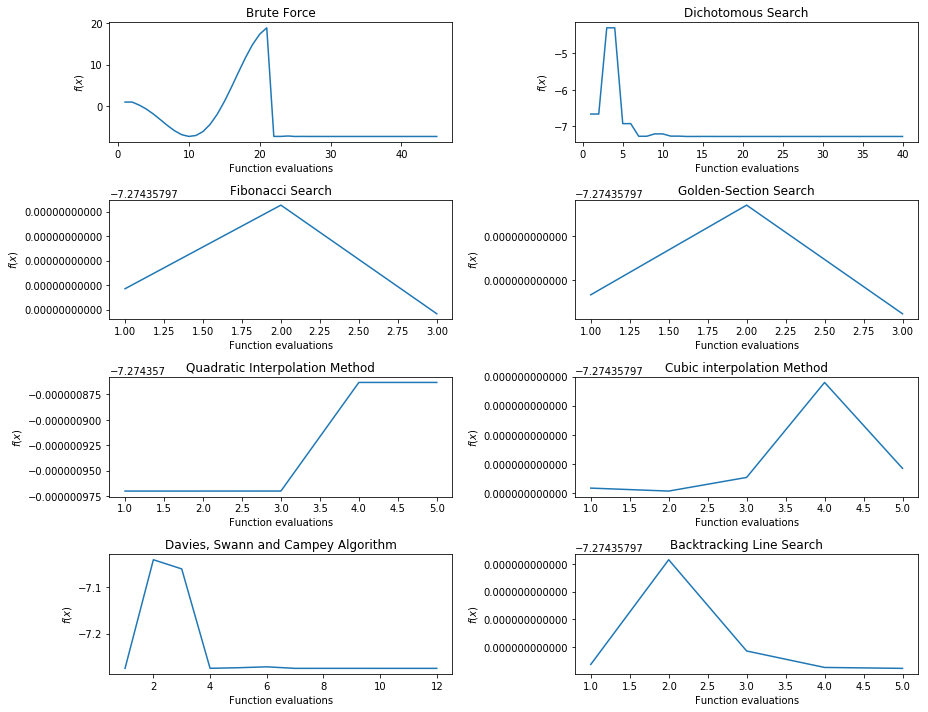

In [15]:
show_chart(results_44)

No exercício 4.4, o _Dichotomous Search_ apresentou um comportamento diferente dos exercícios 4.2 e 4.3.

## Exercício 4.11
$f(\mathbf{x}) = 0.7x^4_1 - 8x^2_1 + 6x^2_2 + \cos(x_1x_2)-8x_1$

### Item a)

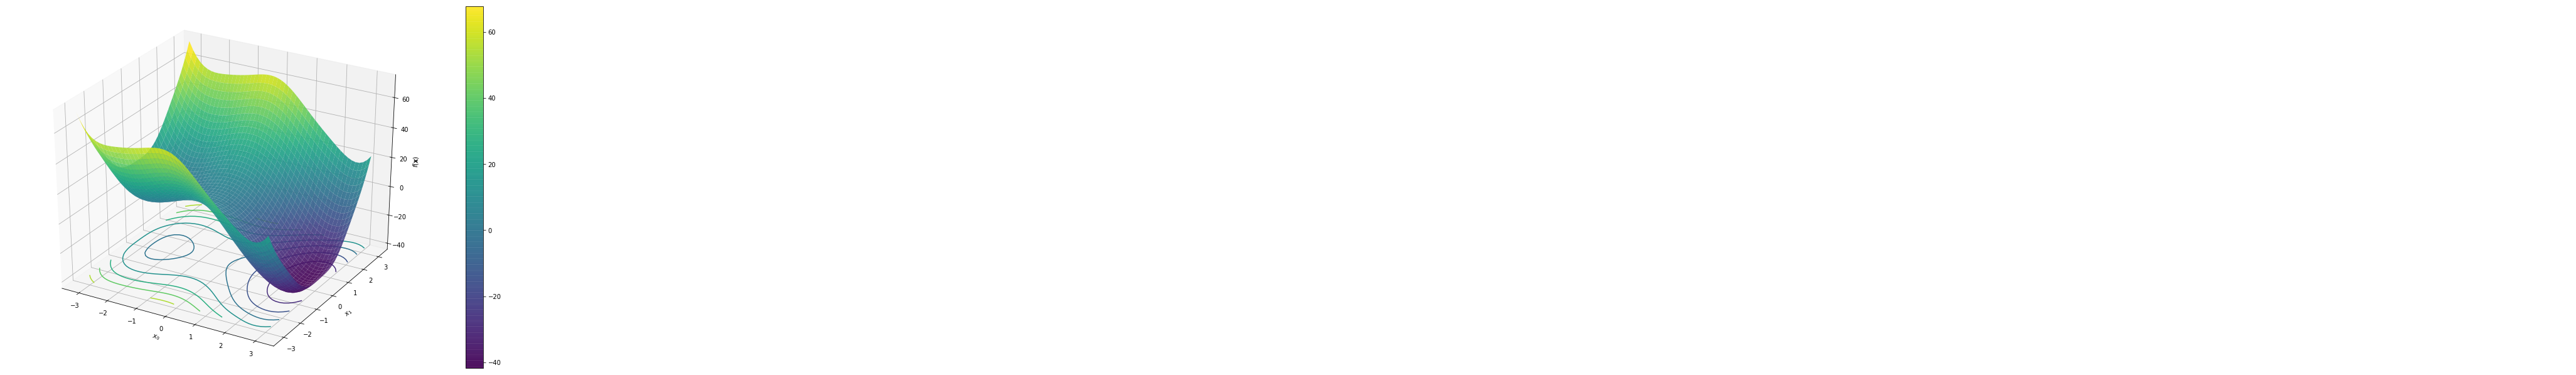

In [16]:
from run_exercises import plot_surface
plot_surface()

### Item b)

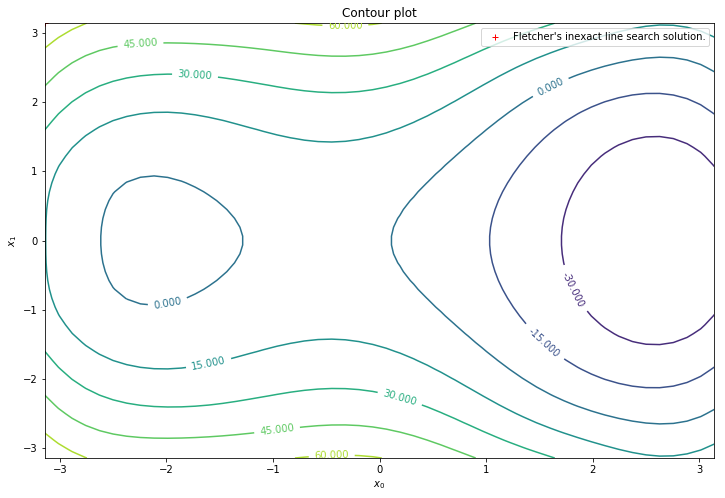

In [41]:
from run_exercises import plot_contour
plot_contour(func.best_x)

### Item d)

In [26]:
from run_exercises import plot_func_alpha
x_0 = np.array([-np.pi, np.pi])
d_0 = np.array([1.0, -1.3])
func = functionObj(order4_polynomial)

item_d_optimizer = InexactLineSearch(func, x_0, d_0)
alpha, f0 = item_d_optimizer._line_search()
print(alpha, f0)

0.00026770921330735196 72.65133615209965


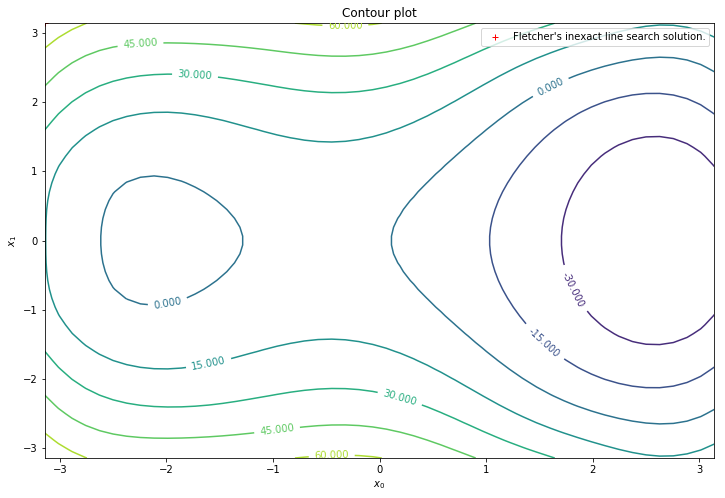

In [28]:
plot_contour(x_0 + alpha*d_0)

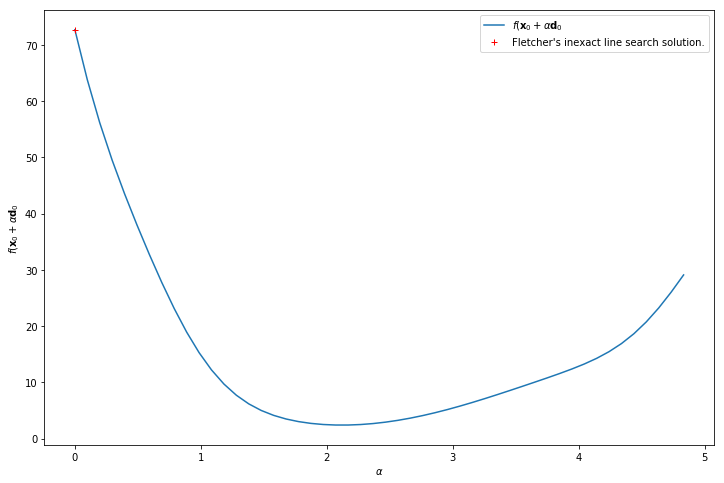

In [27]:
alphas = np.linspace(0, 4.8332)
plot_func_alpha(x_0, d_0, alphas, alpha, f0)

### Item e)

In [29]:
x_0 = np.array([-np.pi, np.pi])
d_0 = np.array([1.0, -1.1])
func = functionObj(order4_polynomial)
item_d_optimizer = InexactLineSearch(func, x_0, d_0)
_, alpha = item_d_optimizer.find_min()

In [30]:
print('x = %s\nf(x) = %.6e\nFunction evals: %d'%(func.best_x, func.best_f, func.fevals))

x = [-2.07291753 -0.00539324]
f(x) = -3.867576e+00
Function evals: 4074


In [32]:
from run_exercises import plot_func_alpha
func = functionObj(order4_polynomial)

item_d_optimizer = InexactLineSearch(func, x_0, d_0)
alpha, f0 = item_d_optimizer._line_search()
print(alpha, f0)

0.00026770921330735196 72.65342651794447


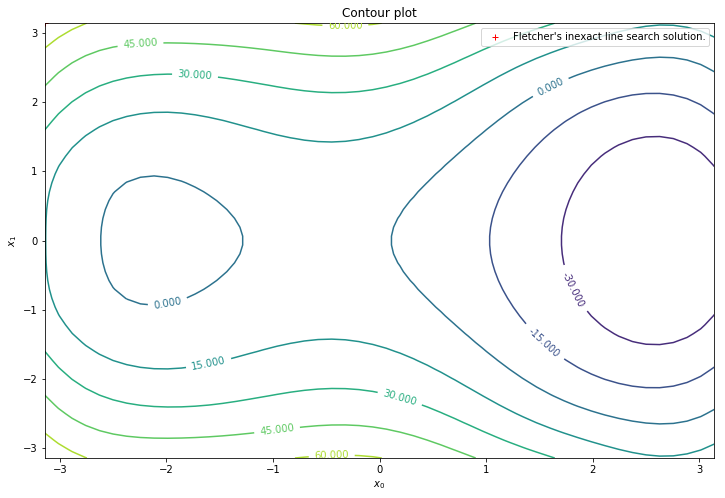

In [33]:
plot_contour(x_0 + alpha*d_0)

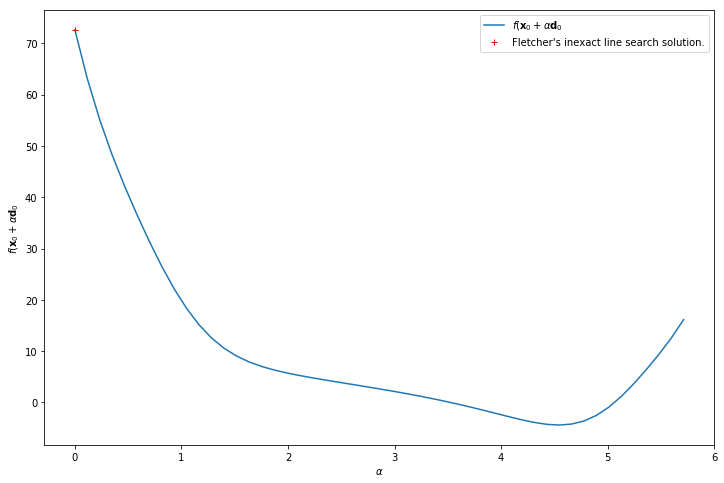

In [35]:
alphas = np.linspace(0, 5.7120)
plot_func_alpha(x_0, d_0, alphas, alpha, f0)